In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import boxcox, yeojohnson, skew

In [2]:
course_df = pd.read_csv("./data files/Cleaned/cleaned_course_data.csv")
prof_df = pd.read_csv("./data files/Cleaned/cleaned_prof_data.csv")
course_df.head(5)

,Course_Code,Course_Name,Number_of_Ratings,Number_of_Comments,Useful,Easy,Liked,Course_Reviews,Course_Enrollment,Department
0,CS 115,Introduction to Computer Science 1,2206,114,485,243,552,"['A bird course, easy to get 90+, but it is us...",4359,Math
1,MATH 135,Algebra for Honours Mathematics,1555,338,1306,669,1213,"['Very easy and interesting course, no concept...",7597,Math
2,ECON 101,Introduction to Microeconomics,1398,264,881,979,629,['you can just google everything but its just ...,6247,Math
3,MATH 137,Calculus 1 for Honours Mathematics,1036,211,870,580,704,"['Easy course', 'The course itself is somewhat...",8237,Math
4,PD 1,Career Fundamentals,1000,189,190,800,70,['The only effect of this course is to add pre...,5790,Coop


In [3]:
prof_df.head(5)

,Professor,Courses_Taught,Professor_Reviews,Liked_%,Clear,Engaging,Number_of_Comments,Number_of_Ratings,Department
0,Aakar Gupta,['CS 230'],"[['TA was more clear and engaging', ""Doesn't r...",0,1,0,2,2,{'Math'}
1,Aaron Hutchinson,['MATH 115'],"[[""There aren't any lectures this term, so I c...",2,2,2,1,2,{'Math'}
2,Aaron Kay,"['PSYCH 253', 'PSYCH 395']",[['By far the best prof ive ever had. He is a ...,0,0,0,9,0,{'Arts'}
3,Aaron Smith,"['MATH 115', 'MATH 211', 'PMATH 467']","[[""I believe our class was the first class he ...",2,2,3,4,3,{'Math'}
4,Aazar Zafar,['AFM 273'],[['Explained some concepts quite well using ex...,0,0,0,5,0,{'Math'}


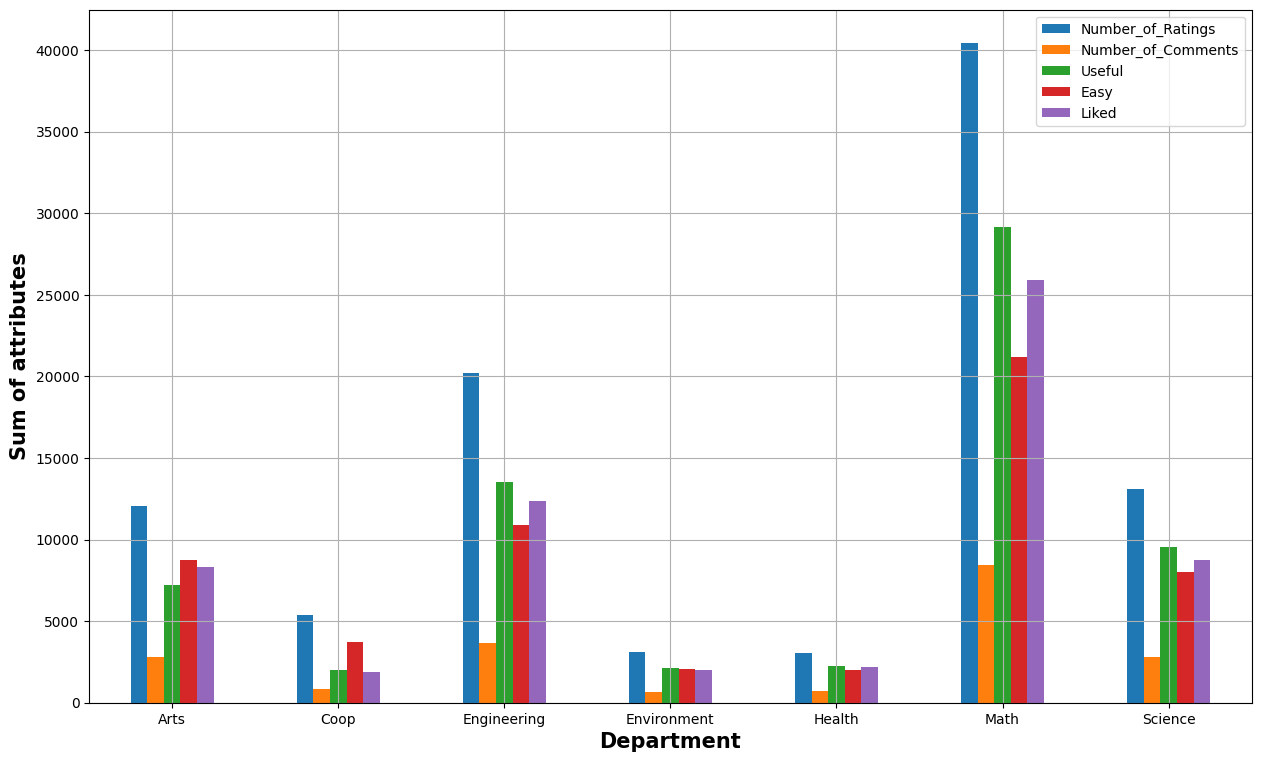

In [4]:
# Bar chat with sum of attributes, course enrollment was removed since it's too high compared to the other bars
ax = course_df.groupby('Department').sum(numeric_only=True).drop("Course_Enrollment", axis=1).plot.bar(figsize=(15,9))

ax.set_xlabel("Department", fontsize= 15, fontweight='bold')
ax.set_ylabel("Sum of attributes", fontsize= 15, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
ax.grid(True)

plt.show()

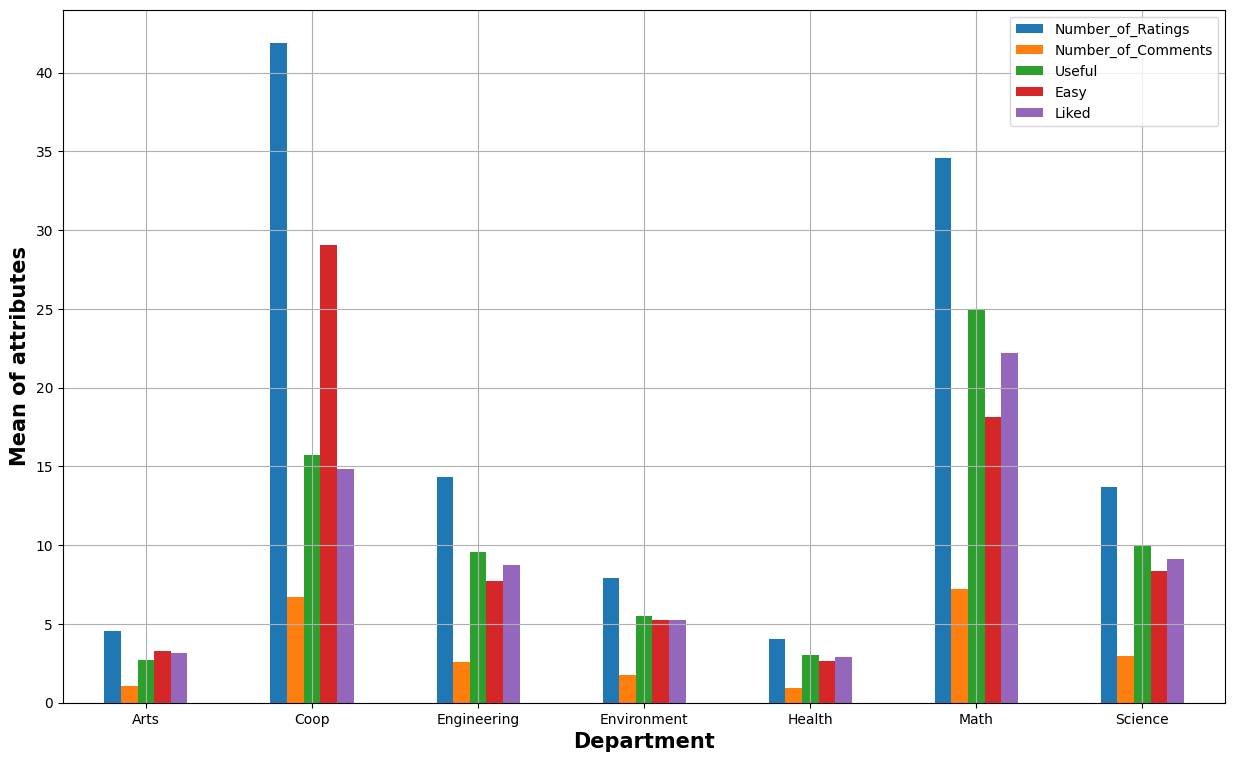

In [5]:
# same as above graph but averaged
ax = course_df.groupby('Department').mean(numeric_only=True).drop("Course_Enrollment", axis=1).plot.bar(figsize=(15,9))

ax.set_xlabel("Department", fontsize= 15, fontweight='bold')
ax.set_ylabel("Mean of attributes", fontsize= 15, fontweight='bold')
ax.tick_params(axis='x', rotation=0)
ax.grid(True)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

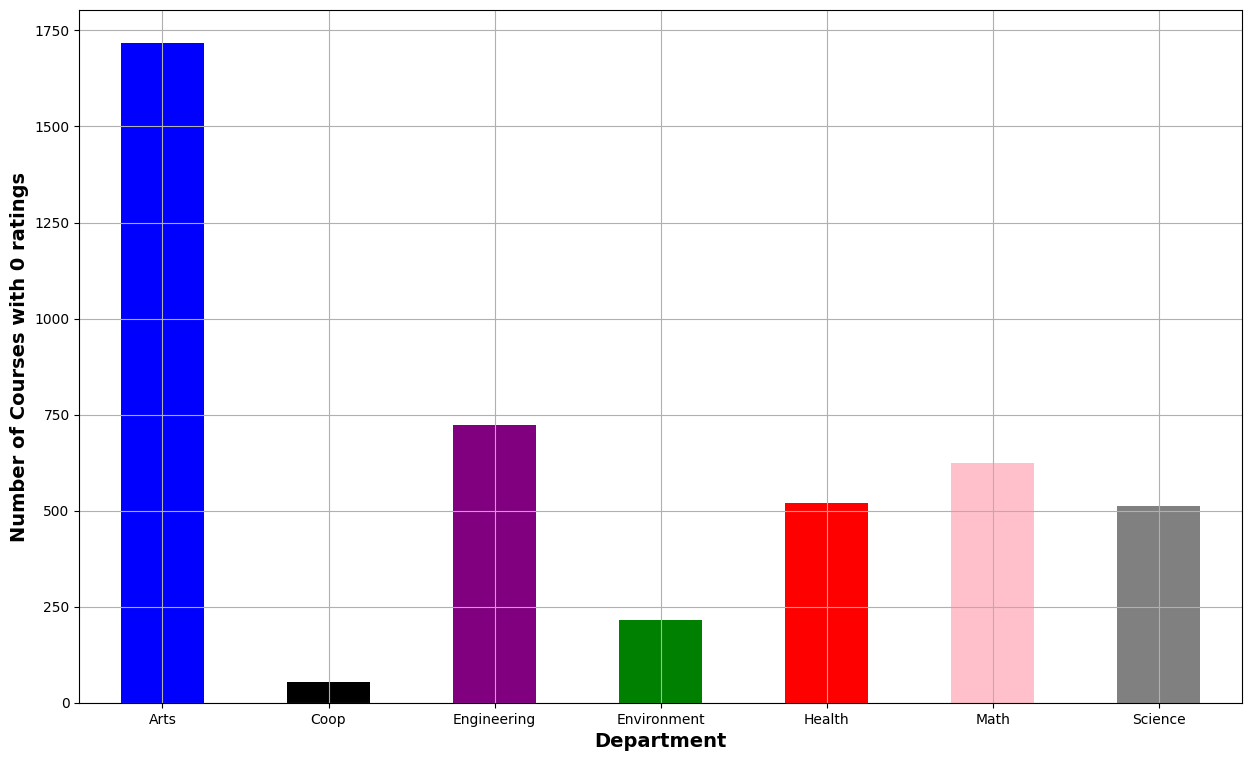

In [6]:
# Number of courses with 0 ratings
colors = ['blue', 'black', 'purple', 'green', 'red', 'pink', 'gray']
ax = course_df[course_df["Number_of_Ratings"] == 0].groupby('Department').count()['Course_Code'].plot.bar(figsize= (15,9), color=colors)

ax.set_xlabel("Department", fontweight='bold', fontsize=14)
ax.set_ylabel("Number of Courses with 0 ratings", fontweight='bold', fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.grid(True)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

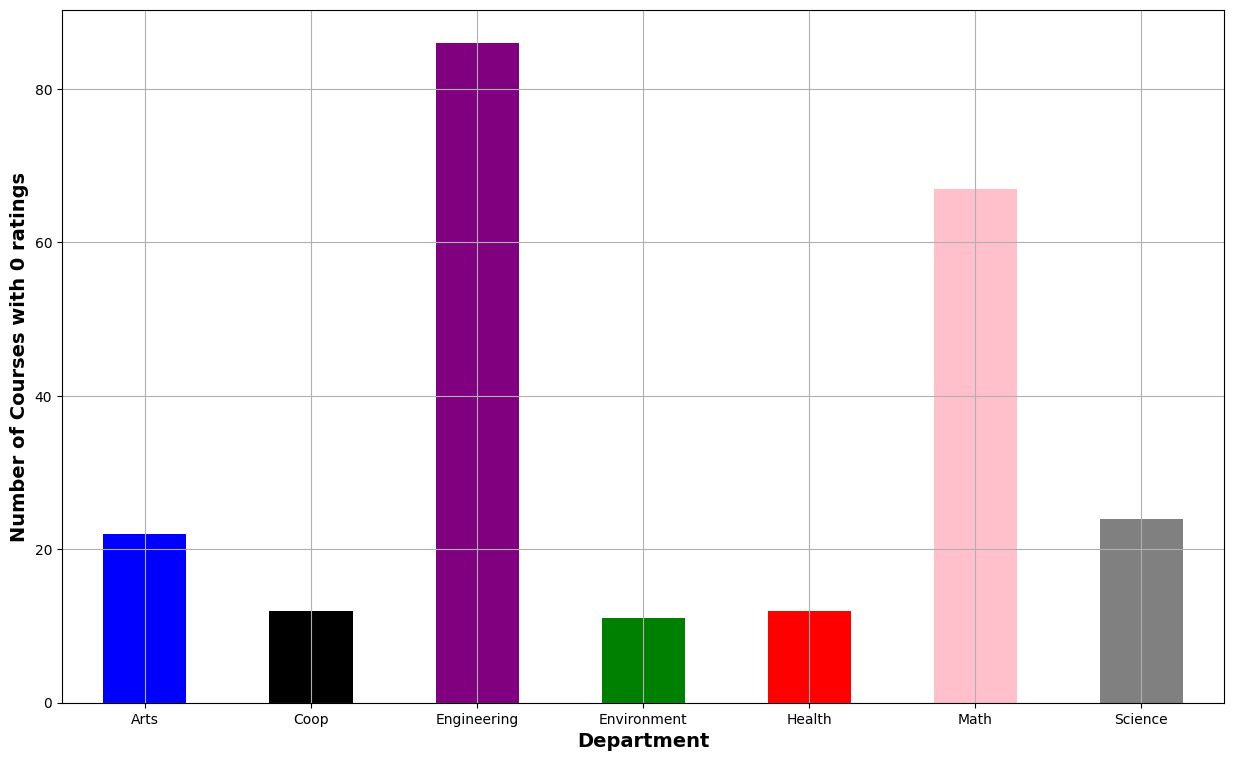

In [7]:
# number of courses where the number of ratings is < x% of the course_enrollment and the number of ratings is > y
colors = ['blue', 'black', 'purple', 'green', 'red', 'pink', 'gray']
ax = course_df[(course_df["Number_of_Ratings"] < course_df['Course_Enrollment'] * 10/100)
               & (course_df["Number_of_Ratings"] > 20)].groupby('Department').count()['Course_Code'].plot.bar(figsize= (15,9), color=colors)

ax.set_xlabel("Department", fontweight='bold', fontsize=14)
ax.set_ylabel("Number of Courses with 0 ratings", fontweight='bold', fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.grid(True)

plt.show

In [8]:
import re
def add_level(row):
    course_number = row["Course_Code"].split(" ")[1]
    course_number = re.sub("\D","",course_number)
    if int(course_number) >= 500:
        return "500+"
    elif int(course_number) < 100:
        return "<100"
    else:
        return course_number[0] + "00"
course_df["Course_Level"] = course_df.apply(add_level, axis=1)
course_df.head(2)

,Course_Code,Course_Name,Number_of_Ratings,Number_of_Comments,Useful,Easy,Liked,Course_Reviews,Course_Enrollment,Department,Course_Level
0,CS 115,Introduction to Computer Science 1,2206,114,485,243,552,"['A bird course, easy to get 90+, but it is us...",4359,Math,100
1,MATH 135,Algebra for Honours Mathematics,1555,338,1306,669,1213,"['Very easy and interesting course, no concept...",7597,Math,100


In [9]:
temp = pd.get_dummies(course_df["Department"])
course_df = course_df.join(temp)

In [10]:
course_df.head(5)

,Course_Code,Course_Name,Number_of_Ratings,Number_of_Comments,Useful,Easy,Liked,Course_Reviews,Course_Enrollment,Department,Course_Level,Arts,Coop,Engineering,Environment,Health,Math,Science
0,CS 115,Introduction to Computer Science 1,2206,114,485,243,552,"['A bird course, easy to get 90+, but it is us...",4359,Math,100,0,0,0,0,0,1,0
1,MATH 135,Algebra for Honours Mathematics,1555,338,1306,669,1213,"['Very easy and interesting course, no concept...",7597,Math,100,0,0,0,0,0,1,0
2,ECON 101,Introduction to Microeconomics,1398,264,881,979,629,['you can just google everything but its just ...,6247,Math,100,0,0,0,0,0,1,0
3,MATH 137,Calculus 1 for Honours Mathematics,1036,211,870,580,704,"['Easy course', 'The course itself is somewhat...",8237,Math,100,0,0,0,0,0,1,0
4,PD 1,Career Fundamentals,1000,189,190,800,70,['The only effect of this course is to add pre...,5790,Coop,<100,0,1,0,0,0,0,0


In [11]:
course_level_df = course_df.groupby("Course_Level").agg({
    "Arts":"sum",
    "Coop":"sum",
    "Engineering":"sum",
    "Environment":"sum",
    "Health":"sum",
    "Math":"sum",
    "Science":"sum",
})
course_level_df

,Arts,Coop,Engineering,Environment,Health,Math,Science
Course_Level,,,,,,,
100,259,14,147,19,66,86,61
200,723,19,207,60,93,141,171
300,843,19,237,96,139,205,191
400,517,28,255,103,152,268,239
500+,285,3,542,111,298,465,291
<100,9,46,24,0,2,4,4


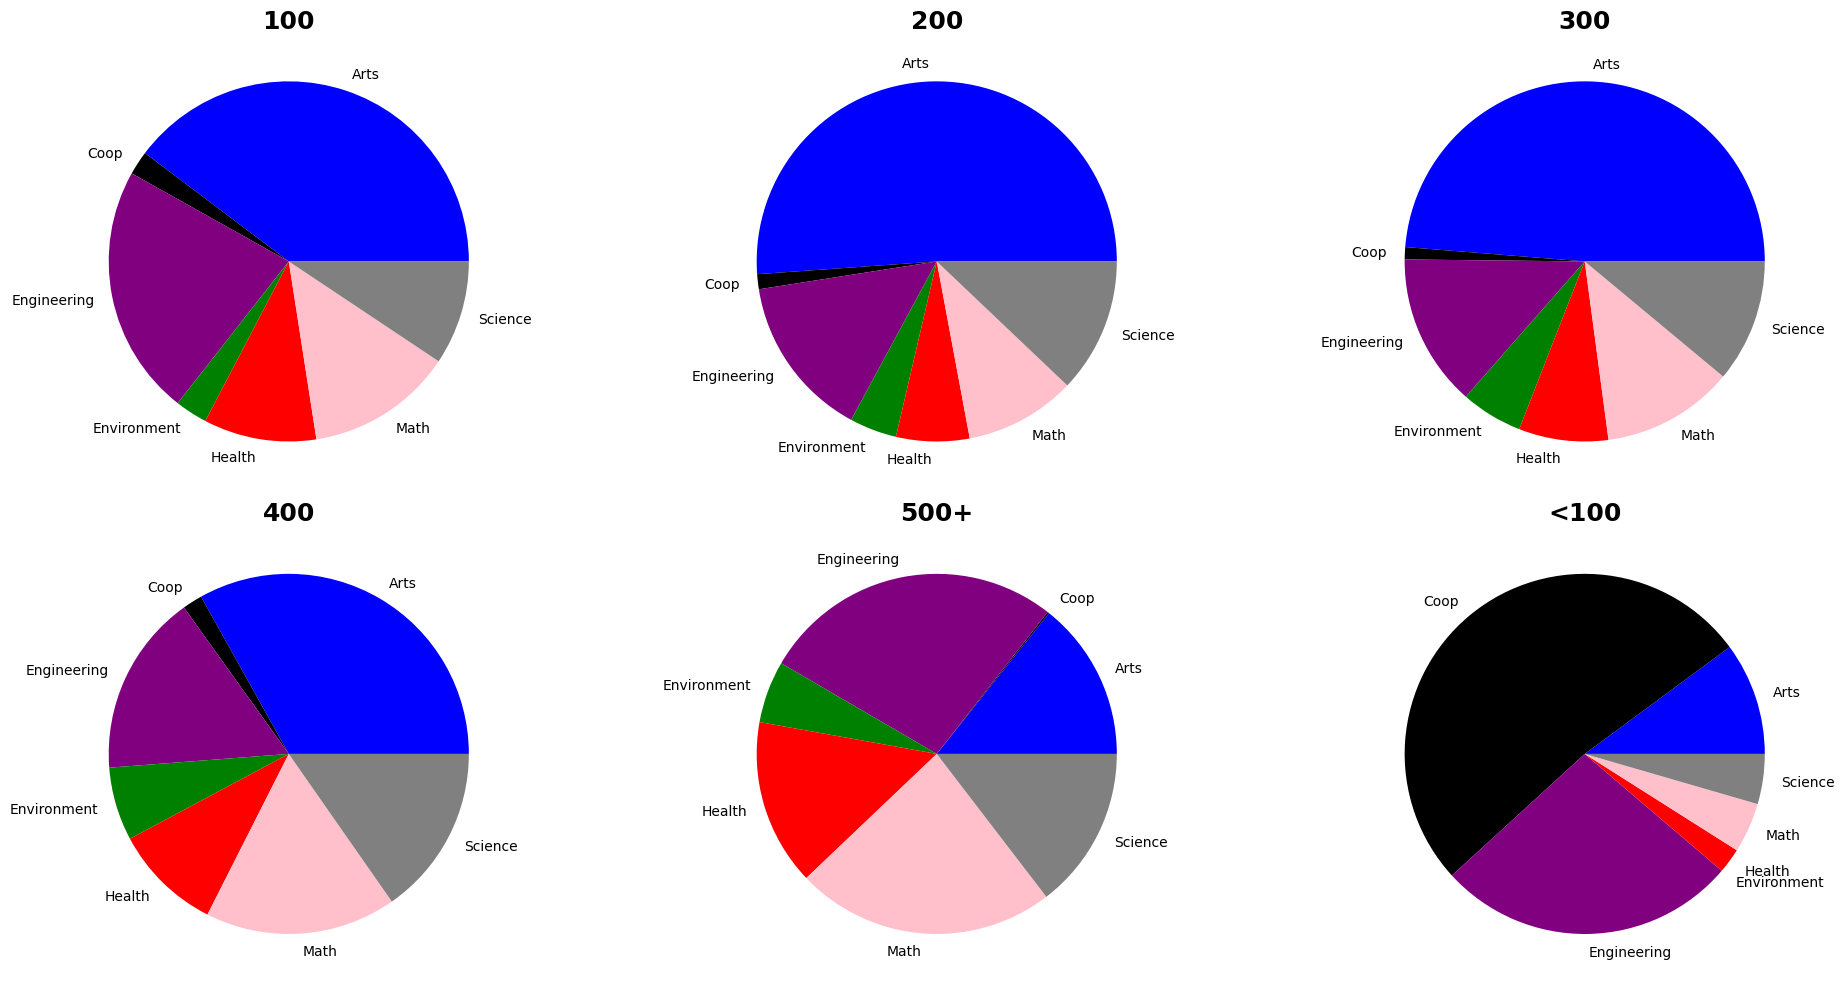

In [12]:
# number of courses in each faculty divided by the course level
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
axes=axes.flatten()
colors = ['blue', 'black', 'purple', 'green', 'red', 'pink', 'gray']

for i in range(len(course_level_df)):
    data = course_level_df.iloc[i]
    title = course_level_df.index[i]
    axes[i].pie(data,labels=course_level_df.columns, colors=colors)
    axes[i].set_title(title, fontweight='bold', fontsize=18)

plt.tight_layout()
plt.show()

In [13]:
course_df.head(5)

,Course_Code,Course_Name,Number_of_Ratings,Number_of_Comments,Useful,Easy,Liked,Course_Reviews,Course_Enrollment,Department,Course_Level,Arts,Coop,Engineering,Environment,Health,Math,Science
0,CS 115,Introduction to Computer Science 1,2206,114,485,243,552,"['A bird course, easy to get 90+, but it is us...",4359,Math,100,0,0,0,0,0,1,0
1,MATH 135,Algebra for Honours Mathematics,1555,338,1306,669,1213,"['Very easy and interesting course, no concept...",7597,Math,100,0,0,0,0,0,1,0
2,ECON 101,Introduction to Microeconomics,1398,264,881,979,629,['you can just google everything but its just ...,6247,Math,100,0,0,0,0,0,1,0
3,MATH 137,Calculus 1 for Honours Mathematics,1036,211,870,580,704,"['Easy course', 'The course itself is somewhat...",8237,Math,100,0,0,0,0,0,1,0
4,PD 1,Career Fundamentals,1000,189,190,800,70,['The only effect of this course is to add pre...,5790,Coop,<100,0,1,0,0,0,0,0


In [14]:
def add_percentage(row, col):
    ratings = int(row["Number_of_Ratings"])
    value = int(row[col])
    
    if ratings == 0:
        return 0
    percentage = round((value/ratings) * 100)
    return percentage
cols = ["Useful", "Easy", "Liked"]
for col in cols:
    new_col = col + "_percentage"
    course_df[new_col] = course_df.apply(add_percentage, col=col, axis=1)
course_df

,Course_Code,Course_Name,Number_of_Ratings,Number_of_Comments,Useful,Easy,Liked,Course_Reviews,Course_Enrollment,Department,...,Arts,Coop,Engineering,Environment,Health,Math,Science,Useful_percentage,Easy_percentage,Liked_percentage
0,CS 115,Introduction to Computer Science 1,2206,114,485,243,552,"['A bird course, easy to get 90+, but it is us...",4359,Math,...,0,0,0,0,0,1,0,22,11,25
1,MATH 135,Algebra for Honours Mathematics,1555,338,1306,669,1213,"['Very easy and interesting course, no concept...",7597,Math,...,0,0,0,0,0,1,0,84,43,78
2,ECON 101,Introduction to Microeconomics,1398,264,881,979,629,['you can just google everything but its just ...,6247,Math,...,0,0,0,0,0,1,0,63,70,45
3,MATH 137,Calculus 1 for Honours Mathematics,1036,211,870,580,704,"['Easy course', 'The course itself is somewhat...",8237,Math,...,0,0,0,0,0,1,0,84,56,68
4,PD 1,Career Fundamentals,1000,189,190,800,70,['The only effect of this course is to add pre...,5790,Coop,...,0,1,0,0,0,0,0,19,80,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7437,GEOG 662,Transforming Canadian Resource Management,0,0,0,0,0,['No reviews'],0,Environment,...,0,0,0,1,0,0,0,0,0,0
7438,ERS 625,Qualitative Methods in Geography,0,0,0,0,0,['No reviews'],0,Environment,...,0,0,0,1,0,0,0,0,0,0
7439,HLTH 725,Sociology of Health,0,0,0,0,0,['No reviews'],0,Health,...,0,0,0,0,1,0,0,0,0,0
7440,ME 655,Advanced Building Energy Analysis,0,0,0,0,0,['No reviews'],0,Engineering,...,0,0,1,0,0,0,0,0,0,0


In [15]:
# Course attributes as you go up the years, also divided into the departments
course_df[course_df["Number_of_Ratings"] > 20].groupby(["Course_Level", "Department"]).agg({
    "Useful_percentage":lambda x: round(x.mean()),
    "Liked_percentage":lambda x: round(x.mean()),
    "Easy_percentage":lambda x: round(x.mean())
})

Useful_percentage  Liked_percentage  Easy_percentage
Course_Level Department                                                       
100          Arts                        61                67               73
             Coop                        39                43               58
             Engineering                 71                66               63
             Environment                 62                63               75
             Health                      80                77               70
             Math                        70                64               56
             Science                     72                70               69
200          Arts                        60                71               69
             Coop                        31                32               57
             Engineering                 74                63               53
             Environment                 71                67               63
             Health                      71                64               62
             Math                        71                64               51
             Science                     75                70               58
300          Arts                        70                73               85
             Coop                         4                 2               33
             Engineering                 68                61               45
             Environment                 88                82               56
             Health                      69                58               63
             Math                        74                67               50
             Science                     79                67               49
400          Coop                         4                 5               30
             Engineering                 60                58               58
             Health                      96                85               52
             Math                        74                66               58
             Science                     54                65               81
500+         Engineering                 91                83                9
<100         Coop                        40                38               78
             Math                        87                89               96

Skewness after transformation: 4.14193
Skewness after transformation: -0.38577
Skewness after transformation: -0.63642
Skewness after transformation: -0.84873


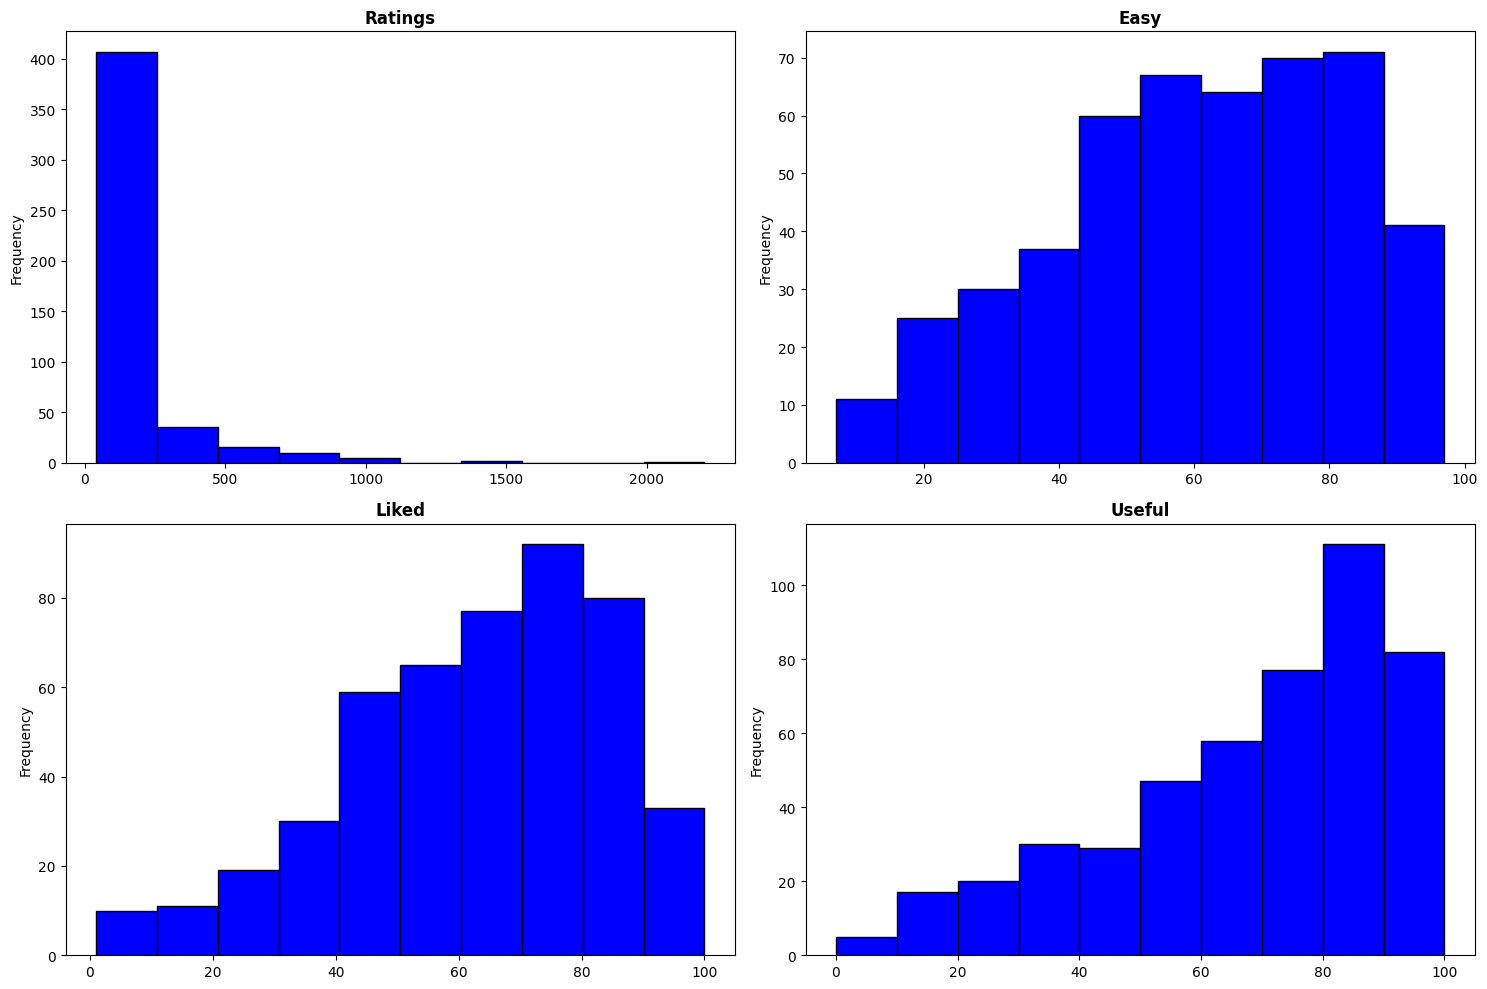

In [22]:
# Find correlation between how easy, liked, useful and the number of ratings of a course. Check to see if it's consistent across departments
# First confirm if the data is normally distributed, if it isn't then use log to normalize it and use pearson corellation, if one or more variables
# isn't normally distributed, then you can use the spearman corellation.

fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()
num_ratings = 40
hist_ratings = course_df[course_df["Number_of_Ratings"] > num_ratings]["Number_of_Ratings"].copy()
hist_easy = course_df[course_df["Number_of_Ratings"] > num_ratings]["Easy_percentage"].copy()
hist_liked = course_df[course_df["Number_of_Ratings"] > num_ratings]["Liked_percentage"].copy()
hist_useful = course_df[course_df["Number_of_Ratings"] > num_ratings]["Useful_percentage"].copy()
hists = [hist_ratings, hist_easy, hist_liked, hist_useful]
for i, plot in enumerate(axs):
    plot.hist(hists[i], color='blue', bins = 10, edgecolor='black')
    plot.set_title(hists[i].name.replace("Number_of_", '').replace("_percentage", ''), fontweight='bold')
    plot.set_ylabel("Frequency")
    skew_val = skew(hists[i])
    print(f"Skewness after transformation: {skew_val:.5f}")

plt.tight_layout()
plt.show()

Skewness after transformation: 0.19570
Skewness after transformation: -0.19808
Skewness after transformation: -0.25848
Skewness after transformation: -0.41610


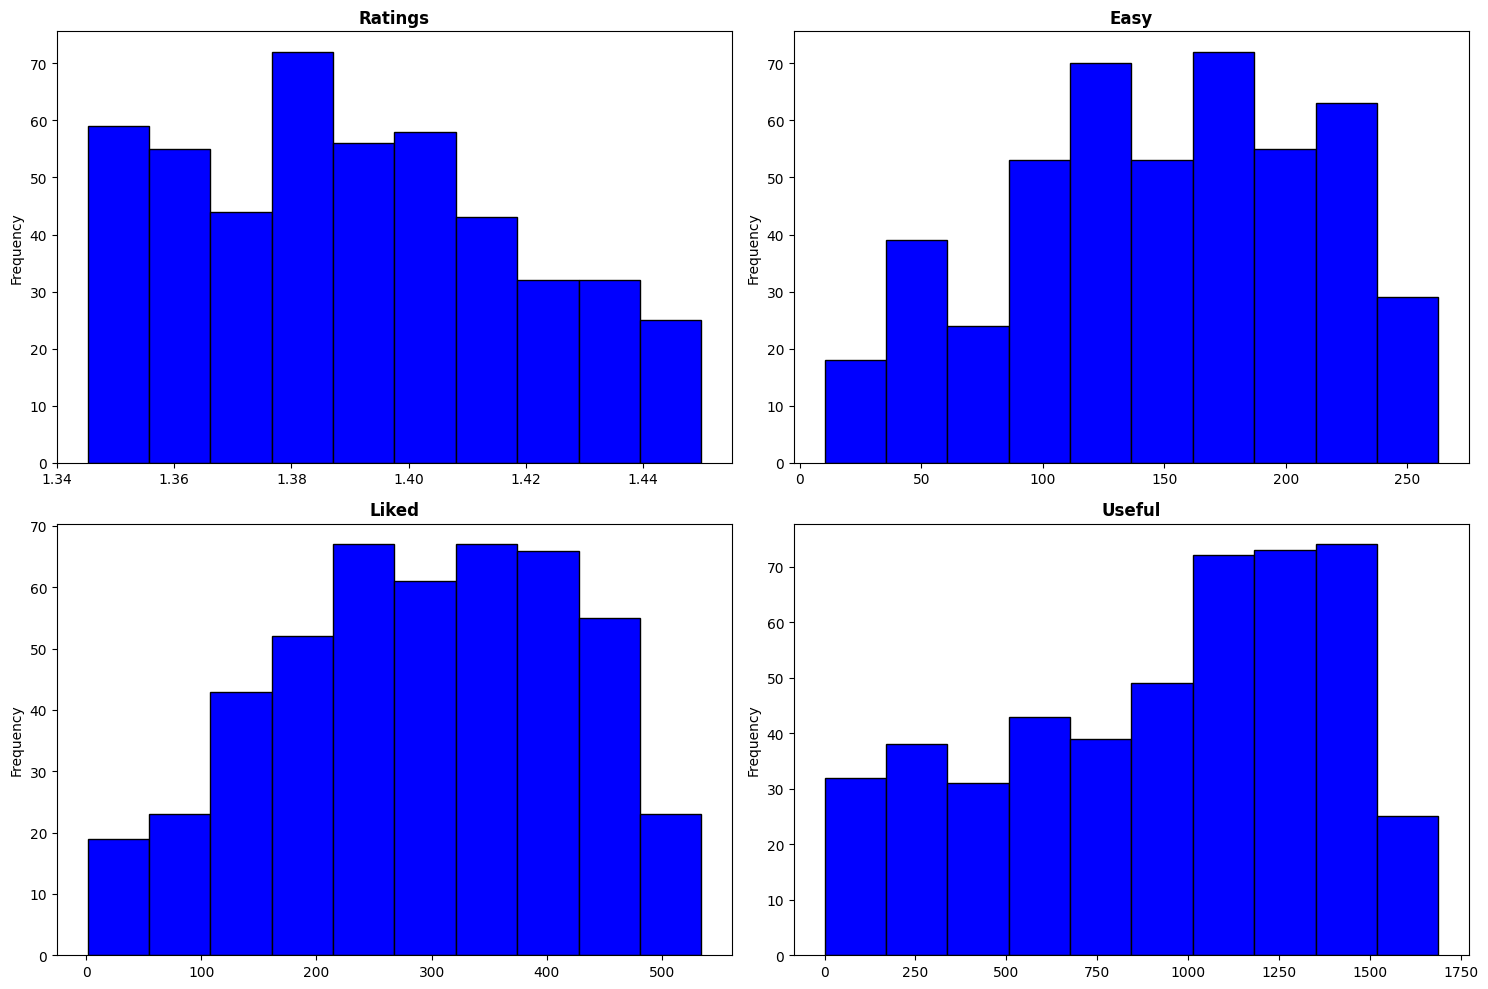

In [25]:
from scipy import stats
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()

hists_ratings_log = np.log(hist_ratings + 1).copy()
hists = [hist_ratings, hist_easy, hist_liked, hist_useful]
titles = ["Ratings", "Easy", "Liked", "Useful"]

for i, plot in enumerate(axs):
    plot_hist, _ = yeojohnson(hists[i])
    plot.hist(plot_hist, color='blue', bins = 10, edgecolor='black')
    plot.set_title(titles[i], fontweight='bold')
    skew_val = skew(plot_hist)
    print(f"Skewness after transformation: {skew_val:.5f}")
    
    plot.set_ylabel("Frequency")

plt.tight_layout()
plt.show()